In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [9]:
gold=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
 gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
gold.shape

(2290, 6)

In [12]:
des=gold.describe()
inf=gold.info()
print(des)
print(inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.8

In [14]:
gold.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [21]:
num_gold=gold.select_dtypes(include=np.number)

correaltion :
2 type:

1.   positive correlation:both the value is increases
2.   negative correlation:if increases another decreases




In [22]:
correlation=num_gold.corr()

<Axes: >

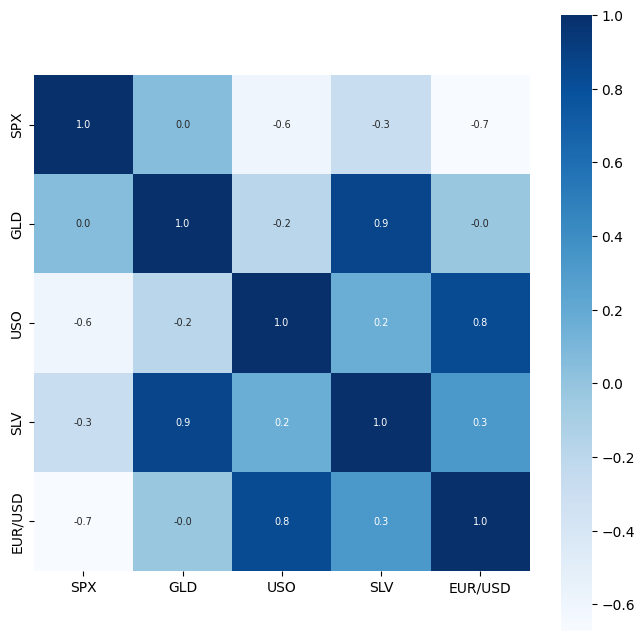

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Blues')


In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-29-4627222093d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'],color='pink')


<Axes: xlabel='GLD', ylabel='Density'>

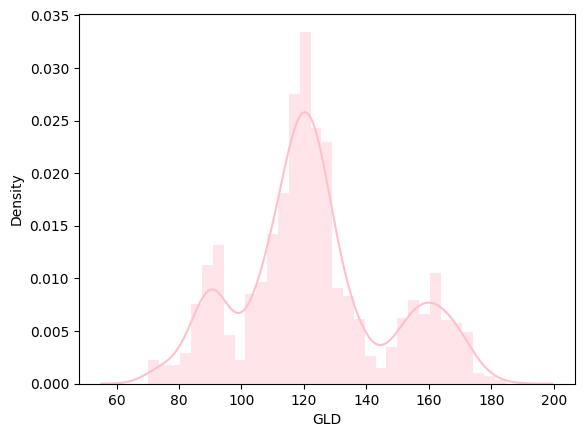

In [29]:
sns.distplot(gold['GLD'],color='pink')

In [31]:
X=gold.drop(['Date','GLD'],axis=1)
y=gold['GLD']
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
model=RandomForestRegressor(n_estimators=100)


In [35]:
#training the data
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
#test data prediction
tes_pre=model.predict(x_test)
print(tes_pre)

[168.49119967  82.06839972 115.91300008 127.63690071 120.93760106
 154.678298   150.14329857 126.24220001 117.48499891 126.05670083
 116.67920066 172.40640119 141.40719866 167.99789885 115.18480029
 117.54310024 139.65890275 170.28990119 159.88400395 159.31529851
 155.2691001  125.31620007 175.7308006  157.08740313 125.24240032
  93.75920004  77.73800008 120.78920014 119.1881999  167.55279848
  88.30330006 125.33310005  91.16830066 117.6524001  121.12229905
 136.68270132 115.39370101 115.27010056 147.19069955 107.27890114
 104.54210265  87.10199777 126.73790062 118.0102998  153.14629963
 119.55719996 108.31629988 107.94239814  93.16270022 127.14839774
  74.81480039 113.61779937 121.0824004  111.41789915 119.00609888
 120.85789934 158.76500085 167.79980057 146.85179717  86.00889885
  94.2740003   86.78639824  90.56899978 119.00110078 126.45270027
 127.57930044 169.25239957 122.28109933 117.3187989   98.41330001
 167.5110004  143.09899844 131.59140212 121.4101022  121.43589989
 119.57730

In [38]:
error_score=metrics.r2_score(y_test,tes_pre)
print("r square prediction:",error_score)

r square prediction: 0.9896279148457854


compare the actual and predicted values


In [40]:
y_test=list(y_test)

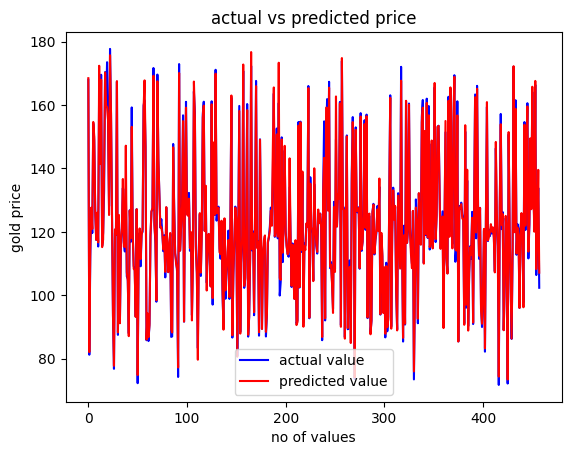

In [42]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(tes_pre,color='red',label='predicted value')
plt.title('actual vs predicted price')
plt.xlabel('no of values')
plt.ylabel('gold price')
plt.legend()
plt.show()
